# 导入数据

In [8]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import math

In [9]:
data_file = '大黑楼逐日.csv'
sensor_code='210200D11101027'

In [10]:
data_list_tmp=[]
with open(data_file, 'r', encoding='UTF-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0]==sensor_code:
            data_list_tmp.append([datetime(2019,int(row[4]),int(row[5]),0,0),float(row[3])])
start_date=data_list_tmp[0][0]
end_date=data_list_tmp[-1][0]
date_list=pd.date_range(start=start_date,end=end_date).tolist()
data_list=[]
j=0
for i in date_list:
    if data_list_tmp[j][0]==i:
        data_list.append([i,data_list_tmp[j][1]])
        j=j+1
    else:
        data_list.append([i,math.nan])
while math.isnan(data_list[0][1]):
    del(data_list[0])
while math.isnan(data_list[-1][1]):
    del(data_list[-1])
data_set=np.array(data_list)
data_series=pd.Series(data_set[:,1],index=data_set[:,0]).astype(float)

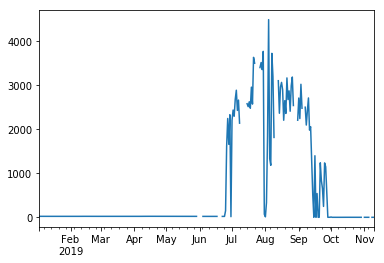

In [11]:
data_series.plot()

# 填补缺失值

In [5]:
data_series=data_series.astype(float).interpolate()

In [6]:
data_series

2019-06-22    63.572
2019-06-23    53.556
2019-06-24    50.338
2019-06-25    61.640
2019-06-26    62.526
               ...  
2019-11-06    78.568
2019-11-07    87.028
2019-11-08    81.768
2019-11-09    82.118
2019-11-10    75.104
Length: 142, dtype: float64

# 数据归一化

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
data_normalized=scaler.fit_transform(np.array(data_series).reshape(-1,1)).reshape(1,-1)[0]

In [8]:
data_normalized

array([ 0.19629947, -0.14689053, -0.25715265,  0.13010108,  0.16045914,
        0.23981497,  0.35857461,  0.34212781,  0.01182114, -0.19095426,
        0.64324139,  0.55641597,  0.28607161,  0.7604934 ,  0.39701902,
        0.41024499,  0.21843413,  0.18382731,  0.14922049,  0.11461367,
        0.08000685,  0.04540003, -0.23083776, -0.08144595,  0.21130718,
        0.20082234,  0.21391126,  0.16162412,  0.23344184, -0.29175947,
       -0.26777454, -0.14212095, -0.01646736,  0.10918623,  0.23483981,
        0.3604934 ,  0.00654446, -0.35096796,  0.49892068,  0.39989721,
       -0.02353949,  0.10083947,  0.34486894, -0.43553195, -0.29196505,
       -0.17025869, -0.33088916, -0.12030152, -1.        , -0.74307007,
       -0.48614014, -0.22921021,  0.02771972,  0.1417509 ,  0.25249272,
        0.02127805, -0.08315916, -0.13482954, -0.21041631,  0.10001713,
        0.10714408,  0.07815659, -0.19383245, -0.20116498, -0.76254925,
       -0.80524242, -0.54257324, -0.48082919, -0.41908515, -0.35

# 划分测试集

In [9]:
train_proportion=0.9
train_length=int(len(data_normalized)*train_proportion)
test_length=len(data_normalized)-train_length
data_train=pd.Series(data_normalized[:train_length],index=data_series.index[:train_length])
data_test=pd.Series(data_normalized[train_length:],index=data_series.index[train_length:])

In [10]:
data_train

2019-06-22    0.196299
2019-06-23   -0.146891
2019-06-24   -0.257153
2019-06-25    0.130101
2019-06-26    0.160459
                ...   
2019-10-22    0.382902
2019-10-23    0.542847
2019-10-24    0.534967
2019-10-25    0.828542
2019-10-26    0.758849
Length: 127, dtype: float64

In [11]:
data_test

2019-10-27    0.535172
2019-10-28    0.548809
2019-10-29    0.711496
2019-10-30    0.695666
2019-10-31    0.679836
2019-11-01    0.664005
2019-11-02    0.447661
2019-11-03    0.394758
2019-11-04    0.411753
2019-11-05    0.693336
2019-11-06    0.710125
2019-11-07    1.000000
2019-11-08    0.819770
2019-11-09    0.831763
2019-11-10    0.591434
dtype: float64

In [12]:
y_train=np.mat(data_train.tolist()[7:]).T
x_train=np.transpose([data_train.shift(1).tolist(),data_train.shift(2).tolist(),data_train.shift(3).tolist(),data_train.shift(4).tolist(),data_train.shift(5).tolist(),data_train.shift(6).tolist(),data_train.shift(7).tolist()])[7:]

# 神经网络定义

In [13]:
import torch
from torch import nn, optim
from torch.autograd import Variable

In [14]:
x = torch.tensor(x_train).float()
y = torch.tensor(y_train).float()
#train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [15]:
myNet = nn.Sequential(
    nn.Linear(7, 15),
    nn.ReLU(),
    nn.Linear(15, 7),
    nn.ReLU(),
    nn.Linear(7,1)
)
print(myNet)

Sequential(
  (0): Linear(in_features=7, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=7, bias=True)
  (3): ReLU()
  (4): Linear(in_features=7, out_features=1, bias=True)
)


# 定义超参数与模型

In [16]:
num_epoches=1000
optimizer = torch.optim.SGD(myNet.parameters(), lr=0.05)
criterion = nn.MSELoss()

In [17]:
for epoch in range(num_epoches):
    out = myNet(x)
    loss = criterion(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%100 == 0:
        print('epoch: {}, loss: {:.4}'.format(epoch, loss.data.item()))

epoch: 0, loss: 0.1684
epoch: 100, loss: 0.1225
epoch: 200, loss: 0.09708
epoch: 300, loss: 0.08508
epoch: 400, loss: 0.07628
epoch: 500, loss: 0.07135
epoch: 600, loss: 0.06846
epoch: 700, loss: 0.06642
epoch: 800, loss: 0.06488
epoch: 900, loss: 0.06346


In [18]:
y_test_normalized=[]
x_test_normalized=data_train[-7:].tolist()
for i in range(test_length):
    pred=myNet(torch.tensor(np.array(x_test_normalized[-7:]).reshape(1,-1)[0]).float()).item()
    y_test_normalized.append(pred)
    x_test_normalized.append(pred)

In [19]:
actual_predictions = pd.Series(scaler.inverse_transform(np.array(y_test_normalized).reshape(-1, 1)).reshape(1,-1)[0],index=data_series.index[-test_length:])

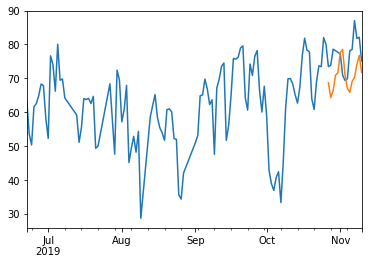

In [22]:
data_series.plot()
actual_predictions.plot()
plt.show()

In [24]:
accuracy=1-(abs(actual_predictions-data_series)/data_series)[train_length:].mean()
print(accuracy)

0.9085909106930954
